# Exploratory Data Analysis
We wil first start by exploring the data and building our intuitions.

## Data extraction 
First we will load the test and train dataset and have a look at it.

we will import the useful libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns


Now we will load the train and testing dataset.

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

Now let's have a sneak peek at the training and test datset

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The survived column in the train dataset is the target variable. If Survived=1, the passenger survived otherwise didn't. This is the variable we are going to predict.

Other features are:
* PassengerId- Id of the passenger onboard the titanic.
* Pclass- The passenger class. It has three values 1,2 and 3.
* Name of the passenger
* Sex- Male or female
* SibSp- number of siblings and spouses travelling with the passenger.
* Parch- number of parents and childern with the passenger
* Ticket number
* Fare
* Cabin name
* The embarkation- Three possible values are there S,C and Q.

## Data Cleaning
Now we will combine the test and train datsets so as to recognize the missing and fill them.

In [5]:
full=pd.concat([train,test])
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we will see how many missing values are there in each column.

In [6]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In survived column the null values are that of test dataset so we don't have to fill them.


We will fill the 2 missing values in the Embarked column by using mode.

In [7]:
from statistics import mode
full["Embarked"]=full["Embarked"].fillna(mode(full["Embarked"]))
full["Embarked"].isnull().sum()

0

Now we will see the correlation among different values in the dataset by using sns heatmap.

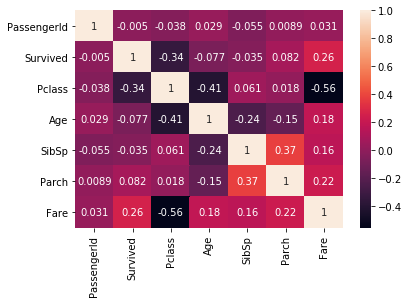

In [8]:
sns.heatmap(full.corr(),annot=True)

We see that the Age and Fare is most closely related to the Pclass. Therefore we will use Pclass to fill the missing values in age and Fare.

In [9]:
full['Age']=full.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

In [10]:
full['Fare'] = full.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

Cabin has lots of missing values so it would be a bad decision to fill them with mode or median or mean. We will just assign them another variable 'U' meaning undefined.

In [11]:
full["Cabin"]=full["Cabin"].fillna("U")

In [12]:
full.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

Now we have filled all our missing values.

In [13]:
full.Cabin.value_counts()

U                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C78                   4
                   ... 
D48                   1
C70                   1
E39 E41               1
D11                   1
C95                   1
Name: Cabin, Length: 187, dtype: int64

We see that the Cabin column has 187 types of unique names but are they all really important?
We can just extract the first character of the cabin that is useful and ignore the rest.

In [14]:
full["Cabin"]=full["Cabin"].astype(str).str[0]
full.Cabin.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

Now our Cabin column has only 9 unique types. That's a good thing.

Now let's see our name column.

In [15]:
print(full.Name.value_counts())
print(full.Name.nunique())

Kelly, Mr. James                                     2
Connolly, Miss. Kate                                 2
Doharr, Mr. Tannous                                  1
Panula, Mrs. Juha (Maria Emilia Ojala)               1
McGough, Mr. James Robert                            1
                                                    ..
Strom, Miss. Telma Matilda                           1
Lindblom, Miss. Augusta Charlotta                    1
Saether, Mr. Simon Sivertsen                         1
Blank, Mr. Henry                                     1
Wells, Mrs. Arthur Henry (Addie" Dart Trevaskis)"    1
Name: Name, Length: 1307, dtype: int64
1307


We see that there are 1307 types of unique names in our dataset. But are the full names important for estimating the survival?

No.
Maybe the more important thing is the title of the name i.e. Mr., Mrs., Miss, etc.

Let's try to extract it.

In [16]:
import re
pattern=' ([A-Za-z]+)\.'
full["Title"]=full.Name.str.extract(pattern,expand=False)
full=full.drop(["Name"],axis=1)
full.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Capt          1
Jonkheer      1
Lady          1
Don           1
Sir           1
Mme           1
Dona          1
Countess      1
Name: Title, dtype: int64

We can see that except Mr, Miss, Mrs and Master others have very small counts. Therefore we can replace them with others. 

In [17]:
full['Title'] = full['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
full.Title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64

We can also combine Sibsp and Parch to the family size!

In [18]:
full["family"]=full["Parch"]+full["SibSp"]
full=full.drop(['Parch','SibSp'],axis=1)

Now let's have a look at our Dataset

In [19]:
full.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,family
0,1,0.0,3,male,22.0,A/5 21171,7.2500,U,S,Mr,1
1,2,1.0,1,female,38.0,PC 17599,71.2833,C,C,Mrs,1
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,U,S,Miss,0
3,4,1.0,1,female,35.0,113803,53.1000,C,S,Mrs,1
4,5,0.0,3,male,35.0,373450,8.0500,U,S,Mr,0


Now let's convert our object datatype to integers so that they can be used for estimation.
We will do so by Label Encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
full['Sex']=le.fit_transform(full['Sex'])

In [21]:
full["Embarked"]=le.fit_transform(full["Embarked"])

In [22]:
full["Cabin"]=le.fit_transform(full["Cabin"])

In [23]:
full["Title"]=le.fit_transform(full["Title"])

Let's have a look at our dataset now.

In [25]:
full.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,family
0,1,0.0,3,1,22.0,A/5 21171,7.2500,8,2,2,1
1,2,1.0,1,0,38.0,PC 17599,71.2833,2,0,3,1
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,8,2,1,0
3,4,1.0,1,0,35.0,113803,53.1000,2,2,3,1
4,5,0.0,3,1,35.0,373450,8.0500,8,2,2,0


## Data correletion
Now we will see how the different columns are related to survival so as to decide whether to keep them or not

In [36]:
test = full[full['Survived'].isna()].drop(['Survived'], axis = 1)      #Recovering test dataset
train = full[full['Survived'].notna()]                                 #Recovering train dataset
train['Survived'] = train['Survived'].astype(np.int8)

C:\Users\Jaadu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


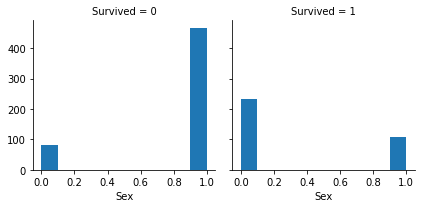

In [38]:
f=sns.FacetGrid(train,col="Survived")
f.map(plt.hist,"Sex")

We can see that women(=0) survived more than men.

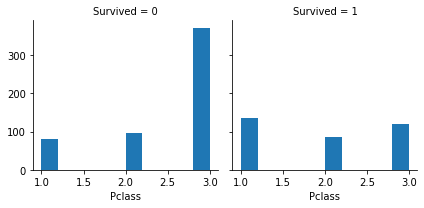

In [39]:
g=sns.FacetGrid(train,col="Survived")
g.map(plt.hist,"Pclass")

Here also we can see that class 1 people survived as compared to class 2 and class 3.

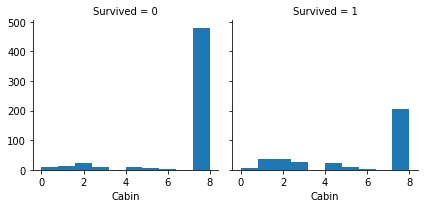

In [40]:
f=sns.FacetGrid(train,col="Survived")
f.map(plt.hist,"Cabin")

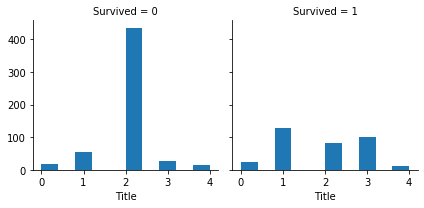

In [41]:
f=sns.FacetGrid(train,col="Survived")
f.map(plt.hist,"Title")

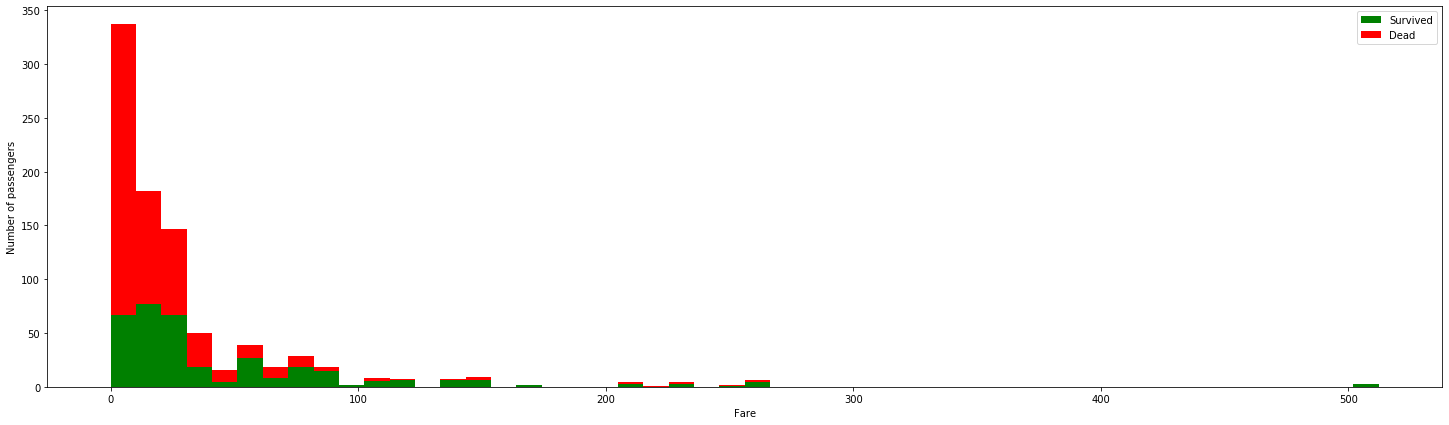

In [45]:
figure=plt.figure(figsize=(25,7))
plt.hist([train[train["Survived"]==1]["Fare"],train[train["Survived"]==0]["Fare"]],stacked=True,color=['g','r'],bins=50,label=["Survived","Dead"]);
plt.xlabel("Fare")
plt.ylabel("Number of passengers")
plt.legend();

We can see that people who paid more had a more chance of survival then people who paid less.

As ticket didn't play any valuable role, we can drop that column.

In [47]:
train=train.drop(["Ticket"],axis=1)
test=test.drop(["Ticket"],axis=1)

# Model

Let's now train different models.

In [49]:
train_x=train.drop(["Survived","PassengerId"],axis=1)
train_y=train['Survived']

from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(train_x,train_y)
pred1=logisticRegression.predict(train_x)

In [50]:
from sklearn.ensemble import RandomForestClassifier

#Initialize randomForest
randomForest = RandomForestClassifier()
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7] }

In [52]:
from sklearn.model_selection import GridSearchCV

# Grid search
randomForest_CV = GridSearchCV(estimator = randomForest, param_grid = param_grid, cv = 5)
randomForest_CV.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [53]:
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 100}

In [54]:
randomForestFinalModel = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'log2', n_estimators = 300)

In [55]:
randomForestFinalModel.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
pred2=randomForestFinalModel.predict(train_x)

Now let's predict the accuracy of both models.

In [61]:
from sklearn.metrics import accuracy_score
print("accuracy(logistic regression): ", round(accuracy_score(train_y, pred1), 2))
print("accuracy(Random Forest Classifier): ", round(accuracy_score(train_y, pred2), 2))

accuracy(logistic regression):  0.8
accuracy(Random Forest Classifier):  0.9


Random Forest Claasifier performs better.

Now let's submit out submission.

In [58]:
test["Survived"]=randomForestFinalModel.predict(test.drop(['PassengerId'], axis = 1))


In [59]:
test[['PassengerId', 'Survived']].to_csv('pg_submission.csv', index = False)

Done!

Also I would be more than happy if you could find out a way to improve my solutions.
Please let me know in the comments.